# Algoritmo Genético

In [19]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [20]:
# Clase para poder crear ciudades con sus correspondientes coordenadas en (x,y)
# Esta clase contiene un método para determinar la distancia con respecto a otra ciudad
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        # Calculará la distancia Pitagórica entre 2 puntos
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        # Este método cambia la representación de los objetos creados. Esto será útil
        # para cuando las ciudades creadas sean ingresadas a listas.
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [21]:
# Estas líneas muestran el resultado de cambiar/no cambiar el método __repr__
ciudad_a=City(2,3)
print(ciudad_a.__repr__())
ejemplo=[]
ejemplo.append(ciudad_a)
print(ejemplo)

(2,3)
[(2,3)]


A continuación se muestra como funciona la clase City:

In [22]:
# Creamos 2 ciudades random
ciudad_a=City(2,3)
ciudad_b=City(-5,-7)

In [23]:
# Verificamos la posición de la ciudad
vars(ciudad_a)

{'x': 2, 'y': 3}

In [24]:
vars(ciudad_b)

{'x': -5, 'y': -7}

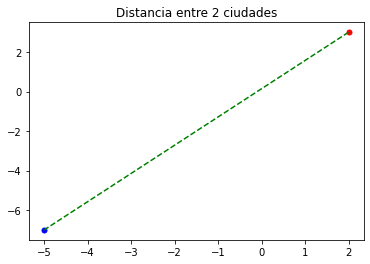

In [25]:
plt.plot(ciudad_a.x,ciudad_a.y, marker='o', markersize=5, color="red")
plt.plot(ciudad_b.x,ciudad_b.y, marker='o', markersize=5, color="blue")
plt.plot([ciudad_a.x, ciudad_b.x],[ciudad_a.y, ciudad_b.y], color="green", linestyle="--")
plt.title("Distancia entre 2 ciudades")
plt.show()

In [26]:
# Revisamos la distancia entre a y b
ciudad_a.distance(ciudad_b)

12.206555615733702

In [27]:
# La distancia debe ser la misma de b hacia a
ciudad_b.distance(ciudad_a)

12.206555615733702

## Valor de ajuste

El siguiente paso, es crear el valor de ajuste para cada una de las ciudades. Dicho valor será igual al **inverso de la distancia entre las ciudades**. Esto a razón de que mientras mas cercanas estén las ciudades, mayor será el nivel de ajuste entre dichas ciudades y por lo tanto más óptima sería esa ruta. Por el contrario, mientras más alejadas estén las ciudades, mayor será el nivel de ajuste, y el nivel óptimo de la solución disminuye.

Puesto que la ruta óptima, estará compuesta por la suma de las distancias recorridas entre cada una de las ciudades, se crea una clase que servirá para calcular el nivel de ajuste entre cada una de las soluciones propuestas para rutas óptimas.

In [28]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.total_distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        # Método que sumará la distancia entre ciudades y de la última al inicio
        if self.total_distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.total_distance = pathDistance
        return self.total_distance
    
    def routeFitness(self):
        # Método que calculará el valor de ajuste
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

Para poder comprobar el funcionamiento de la clase anterior, habrá que crear una ruta de ciudades para determinar su nivel de ajuste:

In [29]:
# Loop para crear 5 objetos ciudad:
for i in range(1, 6):
    x=np.random.randint(-5,5)
    y=np.random.randint(-5,5)
    globals()["Ciudad_"+str(i)]= City(x,y)

In [30]:
Ciudad_1, Ciudad_2, Ciudad_3, Ciudad_4, Ciudad_5

((-4,-4), (-4,-2), (4,-2), (-3,0), (4,-3))

In [31]:
d1=Ciudad_1.distance(Ciudad_2)
d2=Ciudad_2.distance(Ciudad_3)
d3=Ciudad_3.distance(Ciudad_4)
d4=Ciudad_4.distance(Ciudad_5)
d5=Ciudad_5.distance(Ciudad_1)
dT=d1+d2+d3+d4+d5
a=(1/dT)
print("La suma total de las distancias entre la Ciudad 1 y la Ciudad5:\t",dT)
print("Inverso de la distanciatotal, valor de ajuste:\t\t\t",f"{a:.2%}")

La suma total de las distancias entre la Ciudad 1 y la Ciudad5:	 32.958140743442975
Inverso de la distanciatotal, valor de ajuste:			 3.03%


In [32]:
# Creamos una ruta con cada una de los objeto Ciudad_
ruta=[]
for i in range(1, 6):
    ruta.append(globals()["Ciudad_{}".format(i)])

In [33]:
ruta

[(-4,-4), (-4,-2), (4,-2), (-3,0), (4,-3)]

In [34]:
ajuste=Fitness(ruta)
print("Valor de ajuste obtenido de la clase Fitness:\t",f"{ajuste.routeFitness():.2%}")

Valor de ajuste obtenido de la clase Fitness:	 3.03%


In [81]:
# Mapa mostrando los puntos que debe reccorer el vendedor:
def mapping_route(route, user_ax):
    x_min, x_max = 0,0
    y_min, y_max = 0,0
    for i,city in enumerate(route,1):
        user_ax.plot(city.x,city.y,marker='o', markersize=5, color="red")
        user_ax.annotate(i,(city.x*1.1,city.y*1.1))
        if city.x<x_min:
            x_min=city.x
        if city.x>x_max:
            x_max=city.x
        if city.y<y_min:
            y_min=city.y
        if city.y>y_max:
            y_max=city.y
    user_ax.set_xlim([x_min*1.25, x_max*1.25])
    user_ax.set_ylim([y_min*1.25, y_max*1.25])
    return user_ax

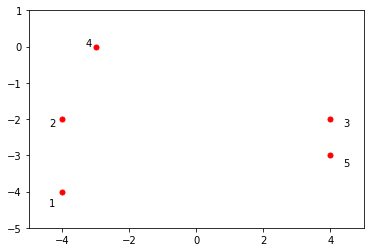

In [82]:
fig, axs=plt.subplots()
mapping_route(ruta, axs)
axs.set_ylim([-5,1])
plt.show()

In [115]:
def walked_route(selected_route, user_ax):
    user_ax=mapping_route(selected_route, user_ax)
    X=[city.x for city in selected_route]
    Y=[city.y for city in selected_route]
    X.append(X[0])
    Y.append(Y[0])
    user_ax.plot(X,Y)
    return user_ax

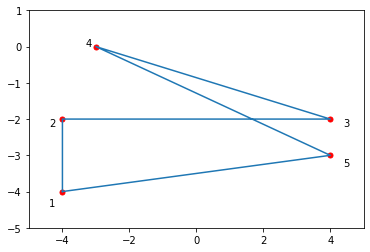

In [116]:
fig, axs=plt.subplots()
walked_route(ruta, axs)
axs.set_ylim([-5,1])
plt.show()

El siguiente elemento, es para cambiar el orden en el que las ciudades fueron ingresadas en la ruta original. De este modo se obitenen alternativas de ruta para recorrer todas las ciudades.

In [99]:
# Ruta original
ruta

[(-4,-4), (-4,-2), (4,-2), (-3,0), (4,-3)]

In [100]:
def createRoute(cityList):
    # El método random.sample crea muestras aleatorias de alguna estructura de datos.
    # En este caso al decirle que use la misma longitud que la original, lo único que
    # hará es cambiar los elementos de posición de manera aleatoria.
    route = random.sample(cityList, len(cityList))
    return route

In [101]:
# Ruta alternativa
createRoute(ruta)

[(-4,-4), (4,-3), (-3,0), (-4,-2), (4,-2)]

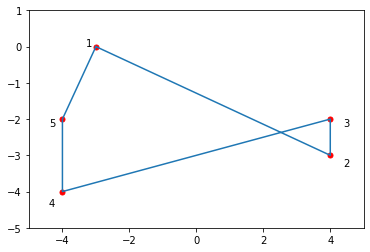

In [118]:
fig, axs=plt.subplots()
walked_route(createRoute(ruta), axs)
axs.set_ylim([-5,1])
plt.show()

In [119]:
# Creando una matriz de distancias para ejemplificar mejor el problema
def distance_matrix(route):
    matriz=np.zeros((len(route),len(route)))
    for i in range(matriz.shape[0]):
        X=route[i]
        for j in range(matriz.shape[1]):
            Y=route[j]
            matriz[i][j]=X.distance(Y)
    filas=["Ciudad"+str(i+1) for i in range(matriz.shape[0])]
    columnas=["Ciudad"+str(i+1) for i in range(matriz.shape[1])]
    df = pd.DataFrame(data=matriz, index=filas, columns=columnas)
    return df

In [121]:
print(ruta)
print(distance_matrix(ruta))

[(-4,-4), (-4,-2), (4,-2), (-3,0), (4,-3)]
          Ciudad1   Ciudad2   Ciudad3   Ciudad4   Ciudad5
Ciudad1  0.000000  2.000000  8.246211  4.123106  8.062258
Ciudad2  2.000000  0.000000  8.000000  2.236068  8.062258
Ciudad3  8.246211  8.000000  0.000000  7.280110  1.000000
Ciudad4  4.123106  2.236068  7.280110  0.000000  7.615773
Ciudad5  8.062258  8.062258  1.000000  7.615773  0.000000


## Creando la población

El siguiente elemento del algoritmo genético, es crear la población de soluciones. Esta población de solución será la primera generación de soluciones. Cada una de ellas es una alternativa válida para solucionar el problema.

In [45]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [144]:
# Supongamos que queremos crear una población de 10 soluciones:
poblacion=initialPopulation(16,ruta)
poblacion

[[(4,-2), (-4,-2), (-3,0), (-4,-4), (4,-3)],
 [(-4,-2), (4,-3), (-3,0), (-4,-4), (4,-2)],
 [(-4,-4), (-4,-2), (4,-2), (-3,0), (4,-3)],
 [(-4,-4), (4,-3), (-3,0), (4,-2), (-4,-2)],
 [(4,-3), (4,-2), (-4,-2), (-4,-4), (-3,0)],
 [(-4,-4), (-3,0), (4,-2), (-4,-2), (4,-3)],
 [(4,-2), (-3,0), (-4,-4), (-4,-2), (4,-3)],
 [(-4,-2), (4,-3), (4,-2), (-4,-4), (-3,0)],
 [(-4,-2), (-3,0), (4,-3), (-4,-4), (4,-2)],
 [(-3,0), (-4,-4), (4,-3), (4,-2), (-4,-2)],
 [(4,-2), (4,-3), (-4,-4), (-3,0), (-4,-2)],
 [(-4,-2), (-4,-4), (4,-3), (-3,0), (4,-2)],
 [(-3,0), (4,-3), (-4,-4), (-4,-2), (4,-2)],
 [(4,-3), (-4,-4), (-4,-2), (4,-2), (-3,0)],
 [(-4,-2), (4,-3), (-3,0), (4,-2), (-4,-4)],
 [(-4,-4), (-3,0), (4,-2), (4,-3), (-4,-2)]]

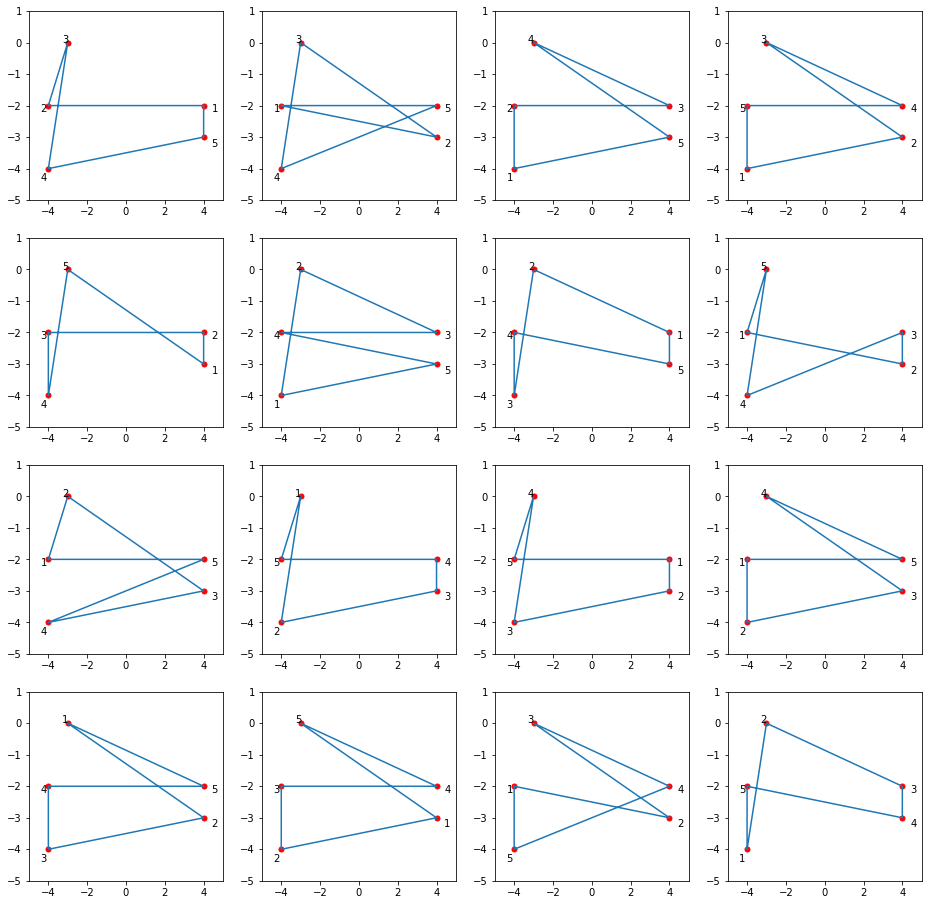

In [145]:
fig, axs= plt.subplots(4,4, figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
    walked_route(poblacion[i], ax)
    ax.set_ylim([-5,1])

## Rankeando las soluciones

Cada una de esas rutas, es una alternativa válida para solucionar el problema. Sin embargo hay que considerar aquellas que tengan los valores de ajuste mayores, por tratarse de las rutas de menor distancia.

In [146]:
def rankRoutes(population):
    # Diccionario que contendrá los cálculos de ajuste de cada ruta
    fitnessResults = {}
    # Ciclo que calcula los ajustes para cada una de las rutas
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    # El resultado final, será una lista generada por el método sorted
    # Dicha lista estará ordenada de mayor a menor, considerando el 
    # valor de ajuste y no el del índice de la ruta.
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [158]:
ranking=rankRoutes(poblacion)
ranking

[(6, 0.04451275022272577),
 (15, 0.04451275022272577),
 (4, 0.04397754224422323),
 (0, 0.04269593881757114),
 (9, 0.04269593881757114),
 (10, 0.04269593881757114),
 (7, 0.042251778801492335),
 (2, 0.030341517374548807),
 (3, 0.030341517374548807),
 (11, 0.030341517374548807),
 (12, 0.030341517374548807),
 (13, 0.030341517374548807),
 (14, 0.030116534126619042),
 (8, 0.029273738955333785),
 (5, 0.02814702688658733),
 (1, 0.027741292021315388)]

## Selección natural / Selección del mas fuerte

De la población de soluciones, se seleccionan aquellas que contengan el valor más óptimo de ajuste. Estas soluciones servirán como padres para la siguiente generación.

In [161]:
def selection(popRanked, eliteSize):
    # Se crea una lista que contendrá los elementos seleccionados 
    # para procrear la siguiente generación.
    selectionResults = []
    
    # De acuerdo al valor indicado, se seleccionan de forma directa
    # aquellas respuestas con los mayores resultados de fitness
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    
    # Dado que se necesita un número idéntico al tamaño de la población 
    # original, el resto de valores serán seleccionados por azar; i.e.
    # puede que se vuelvan a seleccionar rutas ya escogidas, o puede
    # que una de las soluciones no óptimas pase a formar parte del 
    # grupo selecto.
    for i in range(0, len(popRanked) - eliteSize):
        num=np.random.randint(0,len(popRanked))
        selectionResults.append(popRanked[num][0])
    return selectionResults

In [162]:
seleccionados=selection(ranking,8)
seleccionados

[6, 15, 4, 0, 9, 10, 7, 2, 10, 11, 4, 14, 2, 3, 10, 5]

## Procreación y mutación

El primer paso será crear la lista con las soluciones seleccionadas para poder procrear:

In [163]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [164]:
soluciones_para_procrear=matingPool(poblacion,seleccionados)
soluciones_para_procrear

[[(4,-2), (-3,0), (-4,-4), (-4,-2), (4,-3)],
 [(-4,-4), (-3,0), (4,-2), (4,-3), (-4,-2)],
 [(4,-3), (4,-2), (-4,-2), (-4,-4), (-3,0)],
 [(4,-2), (-4,-2), (-3,0), (-4,-4), (4,-3)],
 [(-3,0), (-4,-4), (4,-3), (4,-2), (-4,-2)],
 [(4,-2), (4,-3), (-4,-4), (-3,0), (-4,-2)],
 [(-4,-2), (4,-3), (4,-2), (-4,-4), (-3,0)],
 [(-4,-4), (-4,-2), (4,-2), (-3,0), (4,-3)],
 [(4,-2), (4,-3), (-4,-4), (-3,0), (-4,-2)],
 [(-4,-2), (-4,-4), (4,-3), (-3,0), (4,-2)],
 [(4,-3), (4,-2), (-4,-2), (-4,-4), (-3,0)],
 [(-4,-2), (4,-3), (-3,0), (4,-2), (-4,-4)],
 [(-4,-4), (-4,-2), (4,-2), (-3,0), (4,-3)],
 [(-4,-4), (4,-3), (-3,0), (4,-2), (-4,-2)],
 [(4,-2), (4,-3), (-4,-4), (-3,0), (-4,-2)],
 [(-4,-4), (-3,0), (4,-2), (-4,-2), (4,-3)]]

Cada hijo será creado tomando una parte de la primera solución, y completandolo con los elementos de la segunda solución.

In [35]:
def breed(parent1, parent2):
    # Combinación de los elementos recibidos de los padres
    child = []
    # Elementos tomados del primer padre
    childP1 = []
    # Elementos tomados del segundo padre
    childP2 = []
    
    # De forma aleatoria, se determina cuantos elementos se recibirán del primer padre
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)
    
    # Se agregan los elementos que fueron seleccionados de forma aleatoria
    for i in range(startGene, endGene):
        childP1.append(parent1[i])
    
    # Se seleccionana los elementos de Padre 2 que no fueron seleccionados en Padre 1
    childP2 = [item for item in parent2 if item not in childP1]
    
    # Se crea el hijo
    child = childP1 + childP2
    return child

In [36]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [37]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [38]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [39]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [40]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

# Probando el algoritmo

Para esta prueba se va a considerar una muestra de 25 ciudades, con una población de soluciones igual a 100, seleccionando a los 20 mejores resultados y con una mutación del 0.01. Se revisarán los resultados para un total de 500 generaciones:

In [41]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=random.randint(-200,200), y=random.randint(-200,200)))

In [42]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 4536.069833798304
Final distance: 1822.8593418761707


[(-34,146),
 (152,171),
 (194,149),
 (188,80),
 (150,39),
 (184,-23),
 (138,-55),
 (167,-84),
 (-5,-200),
 (-52,-200),
 (-124,-189),
 (-107,-151),
 (-178,-113),
 (-44,-96),
 (3,-90),
 (16,-84),
 (45,5),
 (80,40),
 (29,30),
 (5,56),
 (-55,34),
 (-122,9),
 (-156,160),
 (-132,143),
 (-95,149)]

# Reuniendo todos los elementos:

In [43]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=random.randint(-200,200), y=random.randint(-200,200)))
    
distance_matrix(cityList)

,Ciudad1,Ciudad2,Ciudad3,Ciudad4,Ciudad5,Ciudad6,Ciudad7,Ciudad8,Ciudad9,Ciudad10,...,Ciudad16,Ciudad17,Ciudad18,Ciudad19,Ciudad20,Ciudad21,Ciudad22,Ciudad23,Ciudad24,Ciudad25
Ciudad1,0.000000,36.249138,99.849887,231.311478,212.313448,363.279507,286.356421,40.261644,234.183689,130.418557,...,61.392182,302.292904,26.570661,20.248457,151.485973,127.003937,178.619708,278.217541,237.918053,202.805325
Ciudad2,36.249138,0.000000,136.000000,217.018432,212.849712,373.483601,303.199604,76.216796,251.872984,99.764723,...,93.021503,331.941260,25.298221,54.405882,169.097605,160.611332,202.249845,266.655208,219.228192,226.176922
Ciudad3,99.849887,136.000000,0.000000,296.986532,248.340492,361.930933,269.833282,61.846584,220.145406,225.816297,...,67.623960,237.674147,118.928550,82.462113,153.055545,64.031242,152.502459,335.715653,311.430570,173.216627
Ciudad4,231.311478,217.018432,296.986532,0.000000,91.760558,242.324163,232.019396,246.337167,207.077280,144.941367,...,229.582229,348.531204,240.351825,249.064249,178.932948,268.739651,221.269067,52.325902,31.144823,230.531993
Ciudad5,212.313448,212.849712,248.340492,91.760558,0.000000,173.404152,142.425419,211.910358,115.451288,181.471761,...,186.526138,257.934100,230.358416,225.000000,104.177733,204.970730,138.809222,101.044545,122.122889,143.558351
Ciudad6,363.279507,373.483601,361.930933,242.324163,173.404152,0.000000,98.325988,349.057302,142.302495,354.830946,...,318.472919,231.173095,386.038858,370.375485,215.406592,301.054812,210.297408,213.150182,272.016544,192.815974
Ciudad7,286.356421,303.199604,269.833282,232.019396,142.425419,98.325988,0.000000,265.580496,52.325902,307.962660,...,234.437625,145.344419,311.271586,289.913780,134.951843,207.099010,117.477657,223.886132,263.053227,97.169954
Ciudad8,40.261644,76.216796,61.846584,246.337167,211.910358,349.057302,265.580496,0.000000,213.356509,164.103626,...,31.144823,267.043068,64.007812,28.861739,133.689940,88.684835,151.980262,289.357910,257.410179,175.855054
Ciudad9,234.183689,251.872984,220.145406,207.077280,115.451288,142.302495,52.325902,213.356509,0.000000,263.410326,...,182.222392,143.808901,259.260487,237.587878,83.006024,158.757677,68.007353,210.601519,237.008439,52.038447
Ciudad10,130.418557,99.764723,225.816297,144.941367,181.471761,354.830946,307.962660,164.103626,263.410326,0.000000,...,166.433170,376.820912,124.775799,150.602125,192.002604,230.766115,236.541751,197.246039,136.124943,257.031127


In [44]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations, ancho=15, alto=15):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    print("Distancia inicial: " + str(1 / rankRoutes(pop)[0][1]))
    mapping_route(population)
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    print("Distancia Óptima: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    walked_route(bestRoute,ancho=ancho, alto=alto)
    plt.show()

Distancia inicial: 3831.046014108705


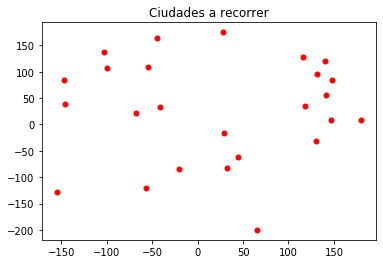

Distancia Óptima: 1578.6006062406768


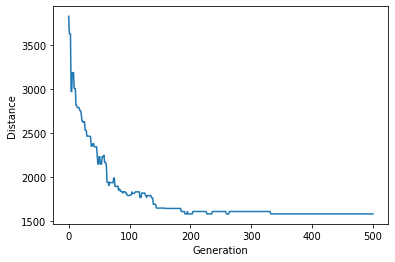

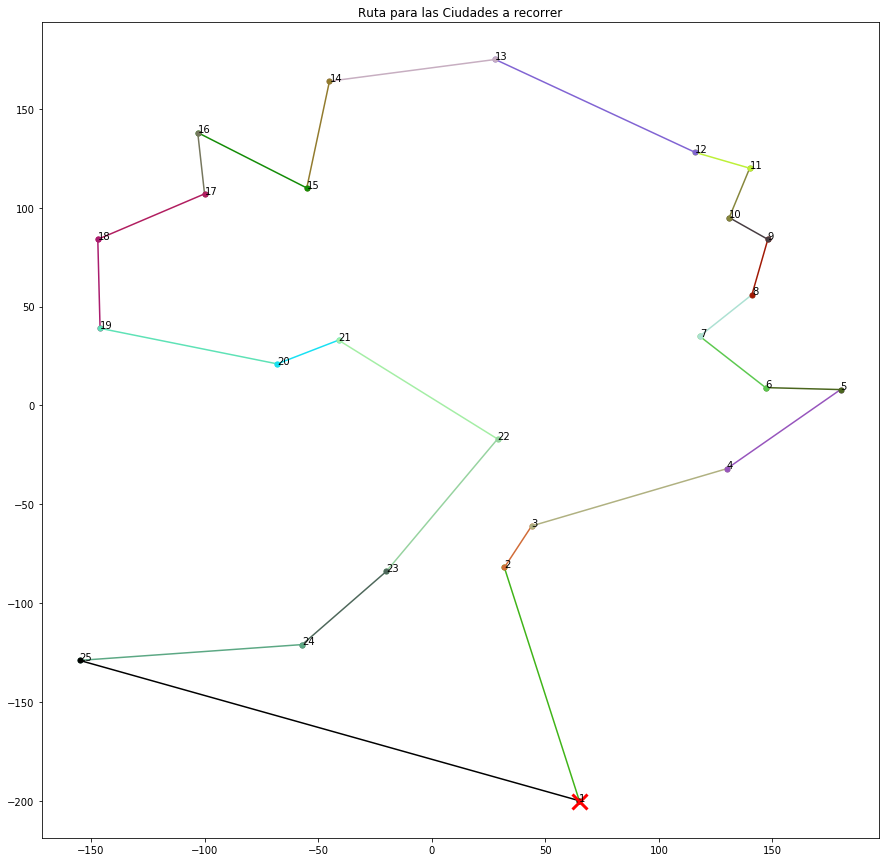

In [45]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)